In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent
import datetime


In [2]:
df=pd.read_html("https://www.espncricinfo.com/series/wpl-2024-25-1463356/points-table-standings",attrs={'class':'ds-w-full ds-table ds-table-md ds-table-auto  ds-w-full'})[0]
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Royal Challengers Bengaluru Women,3,2,1,0,0,4,0.835,WWL,"vs UPW-W, GG-W, DC-W",515/54.5,512/59.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI...","LFebruary 21, 2025, 7th Match, RCB Women vs MI..."
2,2Mumbai Indians Women,3,2,1,0,0,4,0.610,LWW,"vs UPW-W, DC-W, UPW-W",456/56.0,452/60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB...","WFebruary 21, 2025, 7th Match, MI Women vs RCB..."
4,3Delhi Capitals Women,4,2,2,0,0,4,-0.826,WLWL,"vs GG-W, MI-W, RCB-W",617/79.5,653/76.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW...","LFebruary 22, 2025, 8th Match, DC Women vs UPW..."
6,4UP Warriorz Women,3,1,2,0,0,2,0.233,LLW,"vs RCB-W, MI-W, GG-W",486/60.0,455/57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"WFebruary 22, 2025, 8th Match, UPW Women vs DC...","WFebruary 22, 2025, 8th Match, UPW Women vs DC...","WFebruary 22, 2025, 8th Match, UPW Women vs DC...","WFebruary 22, 2025, 8th Match, UPW Women vs DC...","WFebruary 22, 2025, 8th

In [3]:
df=df.drop([1,3,5,7,9],axis=0)
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Royal Challengers Bengaluru Women,3,2,1,0,0,4,0.835,WWL,"vs UPW-W, GG-W, DC-W",515/54.5,512/59.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2Mumbai Indians Women,3,2,1,0,0,4,0.610,LWW,"vs UPW-W, DC-W, UPW-W",456/56.0,452/60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3Delhi Capitals Women,4,2,2,0,0,4,-0.826,WLWL,"vs GG-W, MI-W, RCB-W",617/79.5,653/76.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4UP Warriorz Women,3,1,2,0,0,2,0.233,LLW,"vs RCB-W, MI-W, GG-W",486/60.0,455/57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5Gujarat Giants Women,3,1,2,0,0,2,-0.525,LWL,"vs DC-W, RCB-W, UPW-W",465/58.0,467/54.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.reset_index(inplace=True)

In [5]:
ls=list(df['Teams'])
lst=[]
for x in ls:
    y=x[1:]
    lst.append(y)
lst
df.loc[:,'Teams']=lst

In [6]:
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Royal Challengers Bengaluru Women,3,2,1,0,0,4,0.835,WWL,...,515/54.5,512/59.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mumbai Indians Women,3,2,1,0,0,4,0.610,LWW,...,456/56.0,452/60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Delhi Capitals Women,4,2,2,0,0,4,-0.826,WLWL,...,617/79.5,653/76.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,UP Warriorz Women,3,1,2,0,0,2,0.233,LLW,...,486/60.0,455/57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Gujarat Giants Women,3,1,2,0,0,2,-0.525,LWL,...,465/58.0,467/54.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Teams'].unique()

array(['Royal Challengers Bengaluru Women', 'Mumbai Indians Women',
       'Delhi Capitals Women', 'UP Warriorz Women',
       'Gujarat Giants Women'], dtype=object)

In [8]:
int_to=['M', 'W', 'L', 'T', 'N/R', 'PT']
float_to=['NRR']
for x in int_to:
    df[x]=df[x].astype('int')
for y in float_to:
    df[y]=df[y].astype("float")
df

,index,Teams,M,W,L,T,N/R,PT,NRR,Series Form,...,For,Against,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,0,Royal Challengers Bengaluru Women,3,2,1,0,0,4,0.835,WWL,...,515/54.5,512/59.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Mumbai Indians Women,3,2,1,0,0,4,0.610,LWW,...,456/56.0,452/60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Delhi Capitals Women,4,2,2,0,0,4,-0.826,WLWL,...,617/79.5,653/76.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,UP Warriorz Women,3,1,2,0,0,2,0.233,LLW,...,486/60.0,455/57.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Gujarat Giants Women,3,1,2,0,0,2,-0.525,LWL,...,465/58.0,467/54.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['Rk']=np.arange(1,6)

In [10]:
df['Teams']=[x.split(' Women')[0] for x in df['Teams']]

In [11]:
df['Badge']=df['Teams'].apply(
    lambda x: f"C://Users//user//Desktop//Github//Projects//Cricket//{x}.png"
)

In [12]:
df=df[['Rk','Badge','Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR']]

In [13]:
df

,Rk,Badge,Teams,M,W,L,T,N/R,PT,NRR
0,1,C://Users//user//Desktop//Github//Projects//Cr...,Royal Challengers Bengaluru,3,2,1,0,0,4,0.835
1,2,C://Users//user//Desktop//Github//Projects//Cr...,Mumbai Indians,3,2,1,0,0,4,0.610
2,3,C://Users//user//Desktop//Github//Projects//Cr...,Delhi Capitals,4,2,2,0,0,4,-0.826
3,4,C://Users//user//Desktop//Github//Projects//Cr...,UP Warriorz,3,1,2,0,0,2,0.233
4,5,C://Users//user//Desktop//Github//Projects//Cr...,Gujarat Giants,3,1,2,0,0,2,-0.525


In [14]:
bg_color="#ffffff"
text_color="#000000"

plt.rcParams["text.color"]=text_color
plt.rcParams['font.family']='Bebas Neue'
plt.rcParams['font.size']=40

In [15]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="Badge",
        textprops={'ha':'center','va':'center','color':bg_color},
        width=0.75,
        plot_fn=image,
        title="",
    ),
    ColumnDefinition(
        name="Teams",
        textprops={'ha':'left','fontweight':'bold','fontsize':27},
        width=1.75,
        title="Teams",
    ),
    ColumnDefinition(
        name="M",
        textprops={'ha':'center'},
        width=0.5,
        title="M",
    ),
    ColumnDefinition(
        name="W",
        textprops={'ha':'center'},
        width=0.5,
        title="W",
    ),
        ColumnDefinition(
        name="L",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="T",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="N/R",
        textprops={"ha": "center"},
        width=0.5, 
    ),
    ColumnDefinition(
        name="PT",
        textprops={"ha": "center",'fontweight':'bold'},
        width=0.5,
        title='Pts'
    ),
    ColumnDefinition(
        name="NRR",
        textprops={"ha": "center"},
        width=0.5,
        border='right',
    ),
]

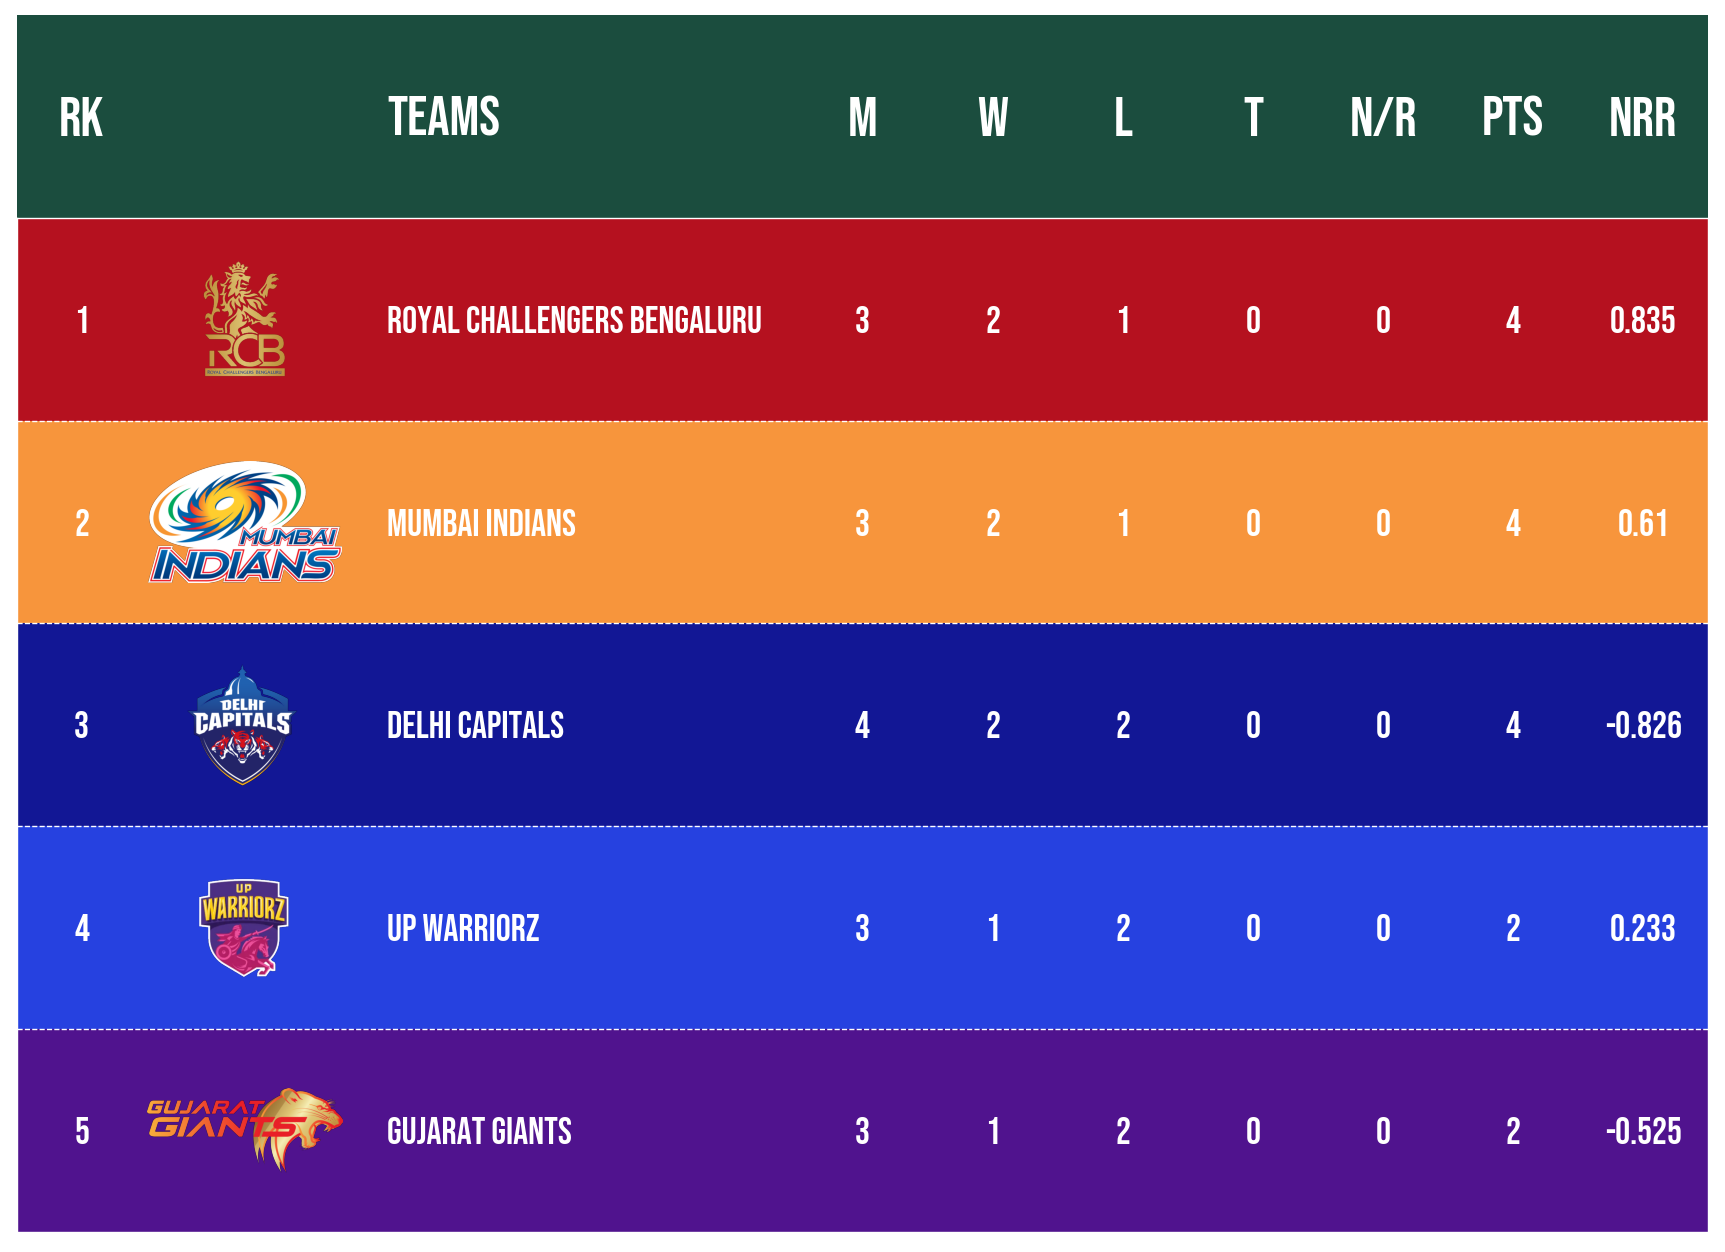

In [16]:
fig, ax = plt.subplots(figsize=(22, 16))
fig.set_facecolor('#ffffff')
ax.set_facecolor('#1B4D3E')

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '--',"color":"#ffffff"},
    footer_divider=True,
    textprops={"fontsize": 27,"color":'#ffffff'},
    footer_divider_kw={"color": "#ffffff", "lw": 1},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-","color":"#ffffff"},
    column_border_kw={"linewidth": 1, "linestyle": "-","color":'#ffffff'},
    ax=ax,
)

#kkr
table.rows[0].set_facecolor("#B5111F")
table.rows[0].set_fontcolor("#ffffff")
#srh
table.rows[1].set_facecolor("#F7953C")
table.rows[1].set_fontcolor("#ffffff")
#rr
table.rows[2].set_facecolor("#121795")
table.rows[2].set_fontcolor("#ffffff")
#rcb
table.rows[3].set_facecolor("#2641E0")
table.rows[3].set_fontcolor("#ffffff")
#csk
table.rows[4].set_facecolor("#50138E")
table.rows[4].set_fontcolor("#ffffff")

cols=list(df.columns)
cols.remove('PT')
cols.append('Pts')

for label in table.ax.texts:
    # print(label)
    if label.get_text() in cols:  
        label.set_fontsize(40)  
        label.set_fontweight("bold")  
        # label.set_fontname("DaFont")  
        label.set_color("#ffffff")  
# ax.text(3.26,4.87,'@copyright',color="white",fontsize=25,alpha=0.5)
# ax.set_title("WPL 2025",pad=20,fontdict={
#     'fontsize':100
# })

plt.show()


In [17]:
date=datetime.datetime.now().strftime("%m_%d_%Y_%H:%M:%S")
fig.savefig(
    f"wpl_1.png",
    # facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight",
)